## Initial setup and modules/packages loading

Importing and loading all packeges we will propably use during the process.

In [18]:
!pip install mlxtend

In [110]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
import re #not a coding language but allows you to find patterns 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
import networkx as nx
import ipympl
from mpl_toolkits.mplot3d import Axes3D
import squarify
import category_encoders as ce
import openpyxl
import datetime as dt

# Force widgets to be shown on notebook (may need permissions from the user)
%matplotlib widget
#%matplotlib inline

In [20]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [21]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

## Data understanding

In [22]:
# Load data 
ds = pd.read_excel('EuropeTop100Attractions_ENG_20190101_20210821.xlsx', engine='openpyxl')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92100 non-null  object        
 7   userLocation       78652 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

In [23]:
# Summary statistics for all variables
ds.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,92120,100,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,NaN,NaN,NaN,2021-08-20 22:09:20.598932992,2021-08-20 08:24:40.077000,2021-08-20 12:08:10.831000064,2021-08-20 15:46:58.171000064,2021-08-21 12:35:39.817250048,2021-08-21 16:27:17.026000,NaN
globalRating,92120.0,NaN,NaN,NaN,4.485166,4.0,4.5,4.5,4.5,5.0,0.178085
positionOnRanking,92120.0,NaN,NaN,NaN,3.91459,1.0,1.0,2.0,6.0,55.0,4.843013
sitesOnRanking,92120.0,NaN,NaN,NaN,748.263537,5.0,154.0,484.0,1186.0,3837.0,802.742304
totalReviews,92120.0,NaN,NaN,NaN,40556.601813,5179.0,14152.0,24454.0,51324.0,163828.0,42914.381014
userName,92100,65785,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78652,12613,"London, UK",3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,477.52056,0.0,20.0,66.0,215.0,607732.0,7270.518677
tripType,63052,5,Couples,31702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Check username cardinality
usernameCount = ds['userName'].value_counts()
usernameCount

Malgorzata@Margo7850p                    31
KodoDrummer@KodoDrummer                  24
Michele Amico🇮🇹🇮🇹🇮🇹🇮🇹@micheleaQ8239JH    19
packcal@packcal                          17
Dimitris L@750dimitrisl                  17
                                         ..
Mogoshadi S@mogoshadis                    1
Crystal Chris@CrystalPistol007            1
Grantley@GrantleyMorgan                   1
Burnsfun@Burnsfun                         1
czlido@czlido                             1
Name: userName, Length: 65785, dtype: int64

In [27]:
# Check reviewRating cardinality
reviewRatingCount = ds['reviewRating'].value_counts()
reviewRatingCount

5    65471
4    18688
3     5100
2     1518
1     1343
Name: reviewRating, dtype: int64

In [28]:
# Check userlocation cardinality
userlocationCount = ds['userLocation'].value_counts()
userlocationCount

London, UK                 3710
Melbourne, Australia        773
Sydney, Australia           736
New York City, NY           699
Toronto, Canada             567
                           ... 
Teresopolis, RJ               1
Pittsworth, Australia         1
Scone, Australia              1
Berea, OH                     1
Elburg, The Netherlands       1
Name: userLocation, Length: 12613, dtype: int64

In [29]:
# Check triptype cardinality
tripTypeCount = ds['tripType'].value_counts()
tripTypeCount

Couples     31702
Family      13596
Friends     11759
Solo         5127
Business      868
Name: tripType, dtype: int64

In [30]:
#Merging two sheets of data to get more information to analysis
wb = openpyxl.load_workbook('EuropeTop100Attractions_ENG_20190101_20210821.xlsx')
print(wb.sheetnames)

['Reviews', 'Attractions']


In [31]:
ds_att = pd.read_excel(io = 'EuropeTop100Attractions_ENG_20190101_20210821.xlsx', sheet_name= 'Attractions',engine= 'openpyxl')
ds_att

,ID,Name,Country,ISO
0,MAG001,Basilica of the Sagrada Familia,Spain,ES
1,MAG002,Parc Guell,Spain,ES
2,MAG003,Tower of London,England,UK
3,MAG004,Casa Batllo,Spain,ES
4,MAG005,Staromestske namesti,Czech Republic,CZ
...,...,...,...,...
95,MAG096,Duomo di Pisa,Italy,IT
96,MAG097,La Lonja de la Seda,Spain,ES
97,MAG098,The Walls of Avila,Spain,ES
98,MAG099,Place Stanislas,France,FR


In [32]:
ds_att.columns

Index(['ID', 'Name', 'Country', 'ISO'], dtype='object')

In [33]:
ds_att.columns = ['localID', 'Name', 'Country', 'ISO']
ds_att.columns

Index(['localID', 'Name', 'Country', 'ISO'], dtype='object')

In [34]:
ds_com = ds.merge(ds_att, how='left', on='localID')
ds_com.head()

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",Basilica of the Sagrada Familia,Spain,ES
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,Basilica of the Sagrada Familia,Spain,ES
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,Basilica of the Sagrada Familia,Spain,ES
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...,Basilica of the Sagrada Familia,Spain,ES


In [35]:
# Summary statistics for all variables
ds_com.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,92120,100,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,NaN,NaN,NaN,2021-08-20 22:09:20.598932992,2021-08-20 08:24:40.077000,2021-08-20 12:08:10.831000064,2021-08-20 15:46:58.171000064,2021-08-21 12:35:39.817250048,2021-08-21 16:27:17.026000,NaN
globalRating,92120.0,NaN,NaN,NaN,4.485166,4.0,4.5,4.5,4.5,5.0,0.178085
positionOnRanking,92120.0,NaN,NaN,NaN,3.91459,1.0,1.0,2.0,6.0,55.0,4.843013
sitesOnRanking,92120.0,NaN,NaN,NaN,748.263537,5.0,154.0,484.0,1186.0,3837.0,802.742304
totalReviews,92120.0,NaN,NaN,NaN,40556.601813,5179.0,14152.0,24454.0,51324.0,163828.0,42914.381014
userName,92100,65785,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78652,12613,"London, UK",3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,477.52056,0.0,20.0,66.0,215.0,607732.0,7270.518677
tripType,63052,5,Couples,31702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#check the first rows
ds_com.head()

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",Basilica of the Sagrada Familia,Spain,ES
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,Basilica of the Sagrada Familia,Spain,ES
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,Basilica of the Sagrada Familia,Spain,ES
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...,Basilica of the Sagrada Familia,Spain,ES


In [37]:
#check the last rows
ds_com.tail()

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
92115,MAG100,2021-08-21 16:27:11.795,4.5,11,677,5179,David M@DTM56,"Cambridge, UK",2055,Couples,2019-03-04,2019-02-01,5,en,A lovely old rambling centre with no logical l...,Centro Storico,Italy,IT
92116,MAG100,2021-08-21 16:27:11.893,4.5,11,677,5179,robert_bos53@robert_bos53,"Geneva, Switzerland",1802,Friends,2019-02-25,2019-02-01,5,en,A one day visit from Rome in February: the his...,Centro Storico,Italy,IT
92117,MAG100,2021-08-21 16:27:11.993,4.5,11,677,5179,Mmarymomm@Mmarymomm,"Pleasanton, CA",1738,Couples,2019-02-14,2018-12-01,5,en,"Is there a more beautiful, historical, and art...",Centro Storico,Italy,IT
92118,MAG100,2021-08-21 16:27:12.086,4.5,11,677,5179,KateJourney@KateJourney,"Exeter, Canada",185,NaN,2019-02-12,2018-11-01,4,en,It is an ironic twist to see all of the modern...,Centro Storico,Italy,IT
92119,MAG100,2021-08-21 16:27:17.026,4.5,11,677,5179,czlido@czlido,"Cape Cod, MA",14,Solo,2019-01-16,2018-12-01,5,en,"The area around Lungarno Vespucci, better know...",Centro Storico,Italy,IT


**General observations**

There are a total of 92120 reviews.

The maximum number of rows in a document is  92120.

There are 65785 different users.

The most frequent user is "Malgorzata@Margo7850p" which is present in 31 reviews.

The most part of users came from Lodon, UK.

All reviews are in english.

The mean of reviews rating is 4.58/5.

Couples represents the most frequent triptype, 31702 of travels were made by them.

There are 97 different attractions, the most visited one was Basilica of the Sagrada Familia, 83309 times, and in the same direction, Spain was the country with more visits.

**Considerations on data quality:**

userLocation and tripType have some Nan values that we will replace them later.
**Identify outliers**

## Data preparation

In [38]:
#identify duplicate rows
duplicateRows = ds_com[ds_com.duplicated()]

In [39]:
#view duplicate rows
duplicateRows

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO


In [42]:
## figuring out if we can remove the outliers
ds_com['positionOnRanking'].value_counts()

1     38547
2     12821
3     11549
7      7026
8      5668
11     2885
4      2834
10     2362
6      2282
5      2223
12     1097
24      806
9       710
31      595
16      312
19      243
55      160
Name: positionOnRanking, dtype: int64

In [43]:
# removing rows from position on ranking 
ds_com =ds_com[ds_com['positionOnRanking']<=12]

In [44]:
ds_com['positionOnRanking'].value_counts()

1     38547
2     12821
3     11549
7      7026
8      5668
11     2885
4      2834
10     2362
6      2282
5      2223
12     1097
9       710
Name: positionOnRanking, dtype: int64

In [45]:
# checking for missing data,  creating bool series for missing data
bool_series = pd.isnull(ds_com['userLocation'])


In [46]:
# filtering data
# displaying data only with location = NaN
ds_com[bool_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,NaN,4,NaN,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ...",Basilica of the Sagrada Familia,Spain,ES
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,NaN,4,NaN,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...,Basilica of the Sagrada Familia,Spain,ES
18,MAG001,2021-08-20 08:24:46.140,4.5,1,1186,163828,Resort714982@Resort714982,NaN,3,NaN,2021-07-22,2021-07-01,5,en,"its unreal, a fairytale, you keep looking at a...",Basilica of the Sagrada Familia,Spain,ES
19,MAG001,2021-08-20 08:24:46.152,4.5,1,1186,163828,Jojo in Spain@JojoinSpain,NaN,2,NaN,2021-07-21,2021-07-01,5,en,Visit at the earliest or latest ties of daylig...,Basilica of the Sagrada Familia,Spain,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92050,MAG099,2021-08-21 16:26:27.447,5.0,1,73,5345,Ines@inesbudding,NaN,3,Solo,2019-06-05,2019-05-01,5,en,I think the place Stanislas is the most beauti...,Place Stanislas,France,FR
92080,MAG100,2021-08-21 16:26:53.381,4.5,11,677,5179,Hannah L@hannahlS3100LD,NaN,1,NaN,2020-02-10,2020-01-01,1,en,"Stay away, Florence is a dangerous city. I was...",Centro Storico,Italy,IT
92081,MAG100,2021-08-21 16:26:53.481,4.5,11,677,5179,domodosila@donosiaul,NaN,3,Family,2019-12-28,2019-12-01,5,en,no one to manage the queue n messy ! these 2 g...,Centro Storico,Italy,IT
92111,MAG100,2021-08-21 16:27:11.424,4.5,11,677,5179,Ilona E@ilonae244,NaN,23,Couples,2019-04-26,2019-04-01,5,en,We fell in love with this beautiful Italian ci...,Centro Storico,Italy,IT


In [115]:
#Use the modal value to replace missing data in userLocation
ds['userLocation'].replace([np.nan], ds['userLocation'].mode()[0], inplace=True)
print(ds)

      localID          extractionDate  globalRating  positionOnRanking  \
0      MAG001 2021-08-20 08:24:40.077           4.5                  1   
1      MAG001 2021-08-20 08:24:40.097           4.5                  1   
2      MAG001 2021-08-20 08:24:40.117           4.5                  1   
3      MAG001 2021-08-20 08:24:40.147           4.5                  1   
4      MAG001 2021-08-20 08:24:40.159           4.5                  1   
...       ...                     ...           ...                ...   
92115  MAG100 2021-08-21 16:27:11.795           4.5                 11   
92116  MAG100 2021-08-21 16:27:11.893           4.5                 11   
92117  MAG100 2021-08-21 16:27:11.993           4.5                 11   
92118  MAG100 2021-08-21 16:27:12.086           4.5                 11   
92119  MAG100 2021-08-21 16:27:17.026           4.5                 11   

       sitesOnRanking  totalReviews                   userName  \
0                1186        163828      Maur

In [47]:
# display data where location previously = NaN
ds_com[bool_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,NaN,4,NaN,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ...",Basilica of the Sagrada Familia,Spain,ES
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,NaN,4,NaN,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...,Basilica of the Sagrada Familia,Spain,ES
18,MAG001,2021-08-20 08:24:46.140,4.5,1,1186,163828,Resort714982@Resort714982,NaN,3,NaN,2021-07-22,2021-07-01,5,en,"its unreal, a fairytale, you keep looking at a...",Basilica of the Sagrada Familia,Spain,ES
19,MAG001,2021-08-20 08:24:46.152,4.5,1,1186,163828,Jojo in Spain@JojoinSpain,NaN,2,NaN,2021-07-21,2021-07-01,5,en,Visit at the earliest or latest ties of daylig...,Basilica of the Sagrada Familia,Spain,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92050,MAG099,2021-08-21 16:26:27.447,5.0,1,73,5345,Ines@inesbudding,NaN,3,Solo,2019-06-05,2019-05-01,5,en,I think the place Stanislas is the most beauti...,Place Stanislas,France,FR
92080,MAG100,2021-08-21 16:26:53.381,4.5,11,677,5179,Hannah L@hannahlS3100LD,NaN,1,NaN,2020-02-10,2020-01-01,1,en,"Stay away, Florence is a dangerous city. I was...",Centro Storico,Italy,IT
92081,MAG100,2021-08-21 16:26:53.481,4.5,11,677,5179,domodosila@donosiaul,NaN,3,Family,2019-12-28,2019-12-01,5,en,no one to manage the queue n messy ! these 2 g...,Centro Storico,Italy,IT
92111,MAG100,2021-08-21 16:27:11.424,4.5,11,677,5179,Ilona E@ilonae244,NaN,23,Couples,2019-04-26,2019-04-01,5,en,We fell in love with this beautiful Italian ci...,Centro Storico,Italy,IT


In [48]:
# checking for missing data review visited,  creating bool series for missing data
dv_series = pd.isnull(ds_com['reviewVisited'])

In [49]:
ds_com[dv_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
78,MAG001,2021-08-20 08:25:18.941,4.5,1,1186,163828,thomas@thomasphunos,"Manchester, UK",1,NaN,2020-09-25,NaT,4,en,"Amazing place , now a days it was not very qui...",Basilica of the Sagrada Familia,Spain,ES
624,MAG001,2021-08-20 08:30:40.273,4.5,1,1186,163828,Paolo616616@Paolo616616,"Prague, Czech Republic",284,NaN,2020-02-03,NaT,5,en,"Beautiful unfinished building, should be compl...",Basilica of the Sagrada Familia,Spain,ES
841,MAG001,2021-08-20 08:33:01.027,4.5,1,1186,163828,StevenK@stevenkoh9999,"Singapore, Singapore",172,NaN,2020-01-08,NaT,5,en,A lifetime of designing and planning by the ar...,Basilica of the Sagrada Familia,Spain,ES
850,MAG001,2021-08-20 08:33:06.518,4.5,1,1186,163828,Margarita@Margaritano,Europe,18,NaN,2020-01-07,NaT,4,en,Everybody suggest Sagrada Familia. I loved the...,Basilica of the Sagrada Familia,Spain,ES
3183,MAG001,2021-08-20 08:55:30.759,4.5,1,1186,163828,Andrew Jones@wigan1969,NaN,2,NaN,2019-09-05,NaT,1,en,"Nice to look at from the outside, however I ha...",Basilica of the Sagrada Familia,Spain,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89332,MAG087,2021-08-21 15:58:48.146,4.0,1,5,6182,Jo P@I4996RBjoannap,"Brough, UK",343,NaN,2019-07-31,NaT,5,en,Plenty to walk around and see and you can walk...,Pont du Gard,France,FR
89338,MAG087,2021-08-21 15:58:48.682,4.0,1,5,6182,GMcC73@GMcC73,"Cork, Ireland",36,NaN,2019-07-28,NaT,4,en,We spent a really enjoyable 4 hours there with...,Pont du Gard,France,FR
89339,MAG087,2021-08-21 15:58:48.774,4.0,1,5,6182,CWXXXJH@CWXXXJH,"Berkhamsted, UK",46,NaN,2019-07-22,NaT,5,en,Well worth signing up for one of the twice dai...,Pont du Gard,France,FR
89347,MAG087,2021-08-21 15:58:54.396,4.0,1,5,6182,Lala L@LalaL827,"Alrewas, UK",87,NaN,2019-07-10,NaT,3,en,"I cycled here in the morning, came off the mai...",Pont du Gard,France,FR


In [50]:
#Use the modal value to replace missing data in reviewvisited
ds_com['reviewVisited'].replace([np.nan], ds_com['reviewVisited'].mode()[0], inplace=True)

In [51]:
ds_com[dv_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
78,MAG001,2021-08-20 08:25:18.941,4.5,1,1186,163828,thomas@thomasphunos,"Manchester, UK",1,NaN,2020-09-25,2019-09-01,4,en,"Amazing place , now a days it was not very qui...",Basilica of the Sagrada Familia,Spain,ES
624,MAG001,2021-08-20 08:30:40.273,4.5,1,1186,163828,Paolo616616@Paolo616616,"Prague, Czech Republic",284,NaN,2020-02-03,2019-09-01,5,en,"Beautiful unfinished building, should be compl...",Basilica of the Sagrada Familia,Spain,ES
841,MAG001,2021-08-20 08:33:01.027,4.5,1,1186,163828,StevenK@stevenkoh9999,"Singapore, Singapore",172,NaN,2020-01-08,2019-09-01,5,en,A lifetime of designing and planning by the ar...,Basilica of the Sagrada Familia,Spain,ES
850,MAG001,2021-08-20 08:33:06.518,4.5,1,1186,163828,Margarita@Margaritano,Europe,18,NaN,2020-01-07,2019-09-01,4,en,Everybody suggest Sagrada Familia. I loved the...,Basilica of the Sagrada Familia,Spain,ES
3183,MAG001,2021-08-20 08:55:30.759,4.5,1,1186,163828,Andrew Jones@wigan1969,NaN,2,NaN,2019-09-05,2019-09-01,1,en,"Nice to look at from the outside, however I ha...",Basilica of the Sagrada Familia,Spain,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89332,MAG087,2021-08-21 15:58:48.146,4.0,1,5,6182,Jo P@I4996RBjoannap,"Brough, UK",343,NaN,2019-07-31,2019-09-01,5,en,Plenty to walk around and see and you can walk...,Pont du Gard,France,FR
89338,MAG087,2021-08-21 15:58:48.682,4.0,1,5,6182,GMcC73@GMcC73,"Cork, Ireland",36,NaN,2019-07-28,2019-09-01,4,en,We spent a really enjoyable 4 hours there with...,Pont du Gard,France,FR
89339,MAG087,2021-08-21 15:58:48.774,4.0,1,5,6182,CWXXXJH@CWXXXJH,"Berkhamsted, UK",46,NaN,2019-07-22,2019-09-01,5,en,Well worth signing up for one of the twice dai...,Pont du Gard,France,FR
89347,MAG087,2021-08-21 15:58:54.396,4.0,1,5,6182,Lala L@LalaL827,"Alrewas, UK",87,NaN,2019-07-10,2019-09-01,3,en,"I cycled here in the morning, came off the mai...",Pont du Gard,France,FR


In [52]:
# checking for missing data for trip type,  creating bool series for missing data
tt_series = pd.isnull(ds_com['tripType'])

In [53]:
ds_com[tt_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
5,MAG001,2021-08-20 08:24:40.168,4.5,1,1186,163828,paul n@pauln3630,"Towaco, NJ",21,NaN,2021-08-15,2021-08-01,3,en,The sheer height of this church makes it a onc...,Basilica of the Sagrada Familia,Spain,ES
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,NaN,4,NaN,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ...",Basilica of the Sagrada Familia,Spain,ES
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,NaN,4,NaN,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...,Basilica of the Sagrada Familia,Spain,ES
11,MAG001,2021-08-20 08:24:46.010,4.5,1,1186,163828,journeymaid48@journeymaid48,"Fairport, NY",961,NaN,2021-08-09,2021-07-01,5,en,The Sagrada Familia is the most visited attrac...,Basilica of the Sagrada Familia,Spain,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92090,MAG100,2021-08-21 16:26:59.393,4.5,11,677,5179,G_EvansWales@G_EvansWales,"Brecon, UK",848,NaN,2019-10-09,2019-09-01,5,en,What can be written about this place that has ...,Centro Storico,Italy,IT
92093,MAG100,2021-08-21 16:26:59.670,4.5,11,677,5179,SoCalOregonian@SoCalOregonian,"Murrieta, CA",9514,NaN,2019-09-13,2019-04-01,5,en,Built upon an Etruscan settlement and later th...,Centro Storico,Italy,IT
92095,MAG100,2021-08-21 16:26:59.858,4.5,11,677,5179,JanuszRoman@JanuszRoman,Europe,1097,NaN,2019-09-01,2019-08-01,5,en,Centro Storico is the essence of Florence. You...,Centro Storico,Italy,IT
92096,MAG100,2021-08-21 16:26:59.953,4.5,11,677,5179,stinkwink@stinkwink,"Sydney, Australia",7382,NaN,2019-08-23,2019-06-01,5,en,"When I hear that the city of Renaissance, Flor...",Centro Storico,Italy,IT


In [55]:
ds_com['tripType'].fillna(value = 'Other', inplace = True)
ds_com[tt_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,Other,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
5,MAG001,2021-08-20 08:24:40.168,4.5,1,1186,163828,paul n@pauln3630,"Towaco, NJ",21,Other,2021-08-15,2021-08-01,3,en,The sheer height of this church makes it a onc...,Basilica of the Sagrada Familia,Spain,ES
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,NaN,4,Other,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ...",Basilica of the Sagrada Familia,Spain,ES
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,NaN,4,Other,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...,Basilica of the Sagrada Familia,Spain,ES
11,MAG001,2021-08-20 08:24:46.010,4.5,1,1186,163828,journeymaid48@journeymaid48,"Fairport, NY",961,Other,2021-08-09,2021-07-01,5,en,The Sagrada Familia is the most visited attrac...,Basilica of the Sagrada Familia,Spain,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92090,MAG100,2021-08-21 16:26:59.393,4.5,11,677,5179,G_EvansWales@G_EvansWales,"Brecon, UK",848,Other,2019-10-09,2019-09-01,5,en,What can be written about this place that has ...,Centro Storico,Italy,IT
92093,MAG100,2021-08-21 16:26:59.670,4.5,11,677,5179,SoCalOregonian@SoCalOregonian,"Murrieta, CA",9514,Other,2019-09-13,2019-04-01,5,en,Built upon an Etruscan settlement and later th...,Centro Storico,Italy,IT
92095,MAG100,2021-08-21 16:26:59.858,4.5,11,677,5179,JanuszRoman@JanuszRoman,Europe,1097,Other,2019-09-01,2019-08-01,5,en,Centro Storico is the essence of Florence. You...,Centro Storico,Italy,IT
92096,MAG100,2021-08-21 16:26:59.953,4.5,11,677,5179,stinkwink@stinkwink,"Sydney, Australia",7382,Other,2019-08-23,2019-06-01,5,en,"When I hear that the city of Renaissance, Flor...",Centro Storico,Italy,IT


In [58]:
# Showing that the Nan values in Attraction rows are thet onew where localID does not match so it is fine to go on without replace nothing here
name_atrac = pd.isnull(ds_com['Name'])

In [59]:
ds_com[name_atrac]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
18500,genis,2021-08-20 11:19:08.189,4.5,2,1234,55541,Adrian's_Quests@Adrians_Quests,"Weiden, Germany",371,Other,2021-08-18,2021-08-01,5,en,"A very clean, well kept city center, a conglom...",NaN,NaN,NaN
18501,genis,2021-08-20 11:19:08.230,4.5,2,1234,55541,Angela S@angelasJ5518LZ,"Riga, Latvia",67,Other,2021-08-18,2021-08-01,5,en,"One of the must-see places, it is impossible t...",NaN,NaN,NaN
18502,genis,2021-08-20 11:19:08.258,4.5,2,1234,55541,Arsila@shibho,"Amsterdam, The Netherlands",57,Other,2021-08-15,2020-09-01,5,en,The heart of Prague does not disappoint. Bewar...,NaN,NaN,NaN
18503,genis,2021-08-20 11:19:08.280,4.5,2,1234,55541,WeHa 98@WeHa98,"Aschaffenburg, Germany",212,Other,2021-07-31,2021-07-01,5,en,Wow factor!! Such a beautiful place to sit an...,NaN,NaN,NaN
18504,genis,2021-08-20 11:19:08.300,4.5,2,1234,55541,Aleks@a_komii,"Szczecin, Poland",130,Other,2021-07-26,2021-07-01,5,en,Beautiful place to walk around have a nice str...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24055,u,2021-08-20 12:17:41.028,4.5,8,487,51324,Nicola B@NicolaABaxter,"Edinburgh, UK",215,Couples,2019-01-01,2018-12-01,5,en,"Most enjoyable return visit, with many more ar...",NaN,NaN,NaN
24056,u,2021-08-20 12:17:41.060,4.5,8,487,51324,jaime M@JaimeFM68,"Miami, FL",3,Family,2019-01-01,2019-01-01,5,en,Despite the windy conditions Alastair was abso...,NaN,NaN,NaN
24057,u,2021-08-20 12:17:41.091,4.5,8,487,51324,Peter C@PeterC652,"Reading, UK",131,Family,2019-01-01,2019-01-01,4,en,"You can spend many hours at the castle , there...",NaN,NaN,NaN
24058,u,2021-08-20 12:17:41.106,4.5,8,487,51324,Julia K@R4251TBjuliak,NaN,12,Family,2019-01-01,2019-01-01,5,en,We are absolutely excited from this place. His...,NaN,NaN,NaN


# **RFM Analysis**
After understanding, preparing the data it's time to identify which metrics we will work with to delivery RFM Analysis.
Our objetive in this analysis is identify segments of users to impact them in diffrent moments: some are tottaly actived so we can focus on repurchases(new travels), another are in risck so we need to retain them and the wost cenarious are the ones we have to reactivate, so thare are a lot of time that they have done some travel, they evaluate bad the trips and they hardly ever travel.

Recency = **reviewVisited** - date - date when the customer visited the attraction. The day is always 1 because Tripadvisor only ask users to describe the year and the month, not the day

Frequency = **userContributions** - numeric - how many reviews have the user wrote in TripAdvisor at the moment of the extraction of the review

Monetary = **reviewRating** - numeric - quantitative rating assigned by the user (1 star - bad to 5 stars - excellent)

**userName** - string - user name of the TripAdvisor user who posted the review. = to identify and group the metrics by it.

## Modeling

 We created some different segments to analyse comparing them.
 
 1. PT = which is the atractions from Portugal
 2. Basket Analysis 1 = which filter atractions from the first of the results from Bastel Analysis
 3. Baslet Analysis 2 = which filter atractions from the second of the results from Bastel Analysis
 4. Bastek Analysis 3 = which filter atractions from the third of the results from Bastel Analysis
 5. Data from Before pandemic period
 6. Data from After pandemic period starts
 
** Then we compared them in analysis.**

### RFM GENERAL

In [153]:
#Calculating values for each metric for all data
import datetime
snapshot_date = max(ds_com.reviewVisited) + datetime.timedelta(days=1)
datamart = ds_com.groupby(['userName']).agg({
'reviewVisited': lambda x: (snapshot_date - x.max()).days, 
'userContributions': 'count',
'reviewRating': 'sum'})

datamart.rename(columns = {'reviewVisited': 'Recency',
'userContributions': 'Frequency',
'reviewRating': 'Monetary'}, inplace=True)

datamart.head()

,Recency,Frequency,Monetary
userName,,,
#1 Best@Number1Best,1097,1,5
#Ciccone@932emzc,366,2,8
#Travelendlessbeauty@travelendlessbeauty,793,1,5
#moving mountains@peaceat28,671,2,9
#taxi de Barcelona #taxi#aeropuer@cavataxi,366,1,5


In [154]:
# Determinining RFM cutting points based on the quartiles (default for pandas "describe")
cols = ['Recency','Frequency','Monetary']
X1=datamart
table = X1[cols].describe()
table

,Recency,Frequency,Monetary
count,64759.000000,64759.000000,64759.000000
mean,736.230084,1.389521,6.362343
std,186.350100,0.908720,4.357663
min,1.000000,1.000000,1.000000
25%,671.000000,1.000000,5.000000
50%,763.000000,1.000000,5.000000
75%,854.000000,1.000000,5.000000
max,1705.000000,30.000000,149.000000


In [155]:
# Calculate RMF scores

# Function
def RFMScore(x, col):
    if x <= X1.quantile(0.25)[col]:
        return '1'
    elif  x <= X1.quantile(0.5)[col]:
        return '2'
    elif  x <= X1.quantile(0.75)[col]:
        return '3'
   
    else:
        return '4'

# Process
X1['RScore'] = X1['Recency'].apply(RFMScore, col='Recency')
X1['FScore'] = X1['Frequency'].apply(RFMScore, col='Frequency')
X1['MScore'] = X1['Monetary'].apply(RFMScore, col='Monetary')

In [157]:
# Show first 5
X1.head()

,Recency,Frequency,Monetary,RScore,FScore,MScore
userName,,,,,,
#1 Best@Number1Best,1097,1,5,4,1,1
#Ciccone@932emzc,366,2,8,1,4,4
#Travelendlessbeauty@travelendlessbeauty,793,1,5,3,1,1
#moving mountains@peaceat28,671,2,9,1,4,4
#taxi de Barcelona #taxi#aeropuer@cavataxi,366,1,5,1,1,1


In [158]:
# Create a column with full RMF score and sort the results

# Transform to string
cols = ['RScore','FScore','MScore']
X1[cols] = X1[cols].astype(str)

# Concatenate
X1['RFMScore'] = X1['RScore'] + X1['FScore'] + X1['MScore']

# Sort
X1 = X1.sort_values(by=['RFMScore'])

In [159]:
# Show first 5
X1.head()

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
MichaelNewYork@MichaelNewYork,579,1,5,1,1,1,111
Kenny S@kennys436,548,1,5,1,1,1,111
Kenny J@144kennyj,335,1,5,1,1,1,111
Susan97301@Susan97301,640,1,5,1,1,1,111
Susan@612097865,640,1,5,1,1,1,111


In [161]:
# Calculate statistics per RFM segment 1
RFMStats = X1.reset_index().groupby(['RFMScore']).agg(Nr_users=('userName', lambda i: len(i.unique())),
                                                     avgRecency=('Recency', 'mean'),
                                                     avgFrequency=('Frequency', 'mean'),
                                                     avgMonetary=('Monetary', 'mean')).fillna(0)

In [162]:
RFMStats

,Nr_users,avgRecency,avgFrequency,avgMonetary
RFMScore,,,,
111,14109,537.096534,1.000000,4.535616
141,94,367.542553,2.021277,3.117021
144,5276,526.794162,2.702237,12.539613
211,13139,730.065302,1.000000,4.528731
241,59,731.474576,2.033898,3.440678
244,4153,729.895016,2.599326,12.016133
311,11630,821.471109,1.000000,4.562425
341,58,820.034483,2.017241,3.275862
344,3820,821.728796,2.497382,11.565707


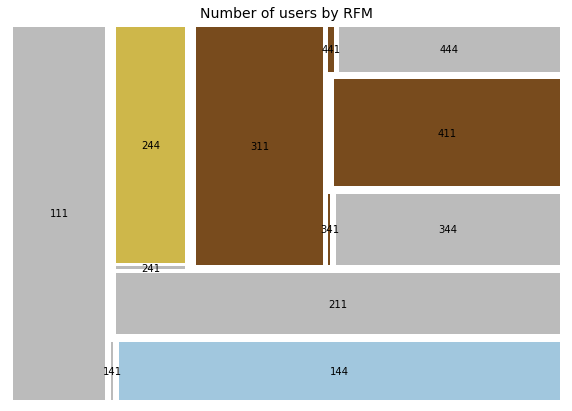

In [183]:
# Treemap with number of customers by segment 1

# Define colors for levels
def assignColor(rfm):
    if (rfm in ['144','114','124','134']):
        hex='#97c2db'   # Blue - Loyalty
    elif (rfm in ['213','223','233','243','113','123','133','143','214','224','234','244','112','122','132','142']):
        hex='#C9B037'   # Gold
    elif (rfm in ['111','121','131','141','211','212','221','222','231','232','241','242','312','313','314','322','323','324','332','333','334','342','343','344','413','414','423','424','433','434','443','444']):
       hex='#B4B4B4'   # Silver
    else:
        hex='#6A3805'   # Bronze
    return hex

color = [assignColor(x) for x in RFMStats.index]

# Draw
fig, ax = plt.subplots(figsize=(10,7))

# Plot
squarify.plot(sizes=RFMStats['Nr_users'], 
              label=RFMStats.index,
              color = color,
              alpha=.9,
              pad=True)                    

# Decoration
plt.title("Number of users by RFM",fontsize=plots_Title_fontSize)
plt.axis('off')
plt.show()


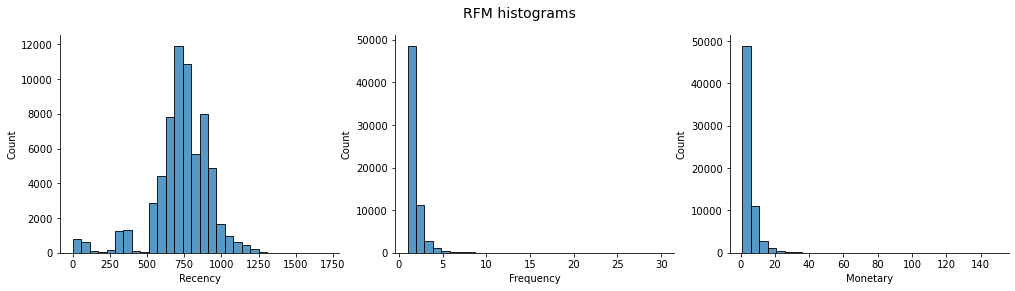

In [164]:
# Histogram of RFM
%matplotlib inline
cols = ['Recency','Frequency','Monetary']

# Draw
fig, ax = plt.subplots(1, 3, figsize=(17,4))
for var, subplot in zip(X[cols], ax.flatten()):
    g = sns.histplot(data=X1,
                bins=30,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("RFM histograms", fontsize=plots_Title_fontSize);

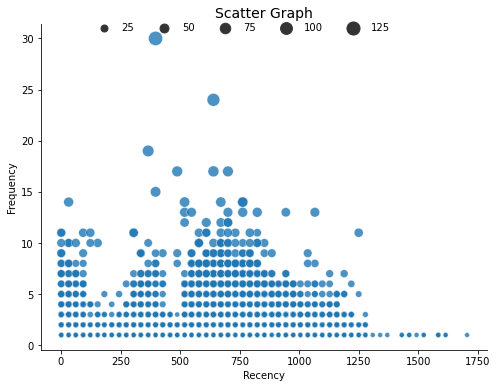

In [165]:
# Scatter plot of these rules

# Draw
fig, ax = plt.subplots(figsize=(8,6))
g = sns.scatterplot(data=X1, x="Recency", y="Frequency", size="Monetary", sizes=(20, 200), alpha=0.8)

# Decoration
sns.despine()
plt.title("Scatter Graph", fontsize=plots_Title_fontSize)
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=6, bbox_to_anchor=(0.45, 1.03), frameon=False)

### RFM PT

In [166]:
#Create a table only with Portugal data
countries = ['Portugal']
PT = ds_com[ds_com.Country.isin(countries)]
PT

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
29827,MAG010,2021-08-20 13:10:44.095,4.0,6,726,36979,Barbs25@Barbs25,"Staffordshire, UK",2273,Friends,2021-08-11,2021-07-01,3,en,Not blown away by it but nice enough to look a...,Torre de Belém,Portugal,PT
29828,MAG010,2021-08-20 13:10:44.126,4.0,6,726,36979,WWH47@WWH47,"Baton Rouge, LA",121,Other,2021-08-02,2021-07-01,5,en,Well worth the visit in the Belem portion of t...,Torre de Belém,Portugal,PT
29829,MAG010,2021-08-20 13:10:44.173,4.0,6,726,36979,Runawayblond@runawayblond,"Chicago, IL",217,Solo,2021-07-26,2021-06-01,4,en,Really cool! Sadly it was closed to explore be...,Torre de Belém,Portugal,PT
29830,MAG010,2021-08-20 13:10:44.204,4.0,6,726,36979,Darren H@DarrenHumphrey,"Orlando, FL",298,Other,2021-07-24,2021-06-01,5,en,What visit to Lisbon is complete without at le...,Torre de Belém,Portugal,PT
29831,MAG010,2021-08-20 13:10:44.257,4.0,6,726,36979,Kevin S@kevins684,"Pontypridd, UK",4550,Other,2021-07-23,2021-07-01,4,en,"A 16th century tower, ornately built so seemin...",Torre de Belém,Portugal,PT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91034,MAG093,2021-08-21 16:16:09.740,4.5,1,101,6805,JAFL@Joao-Jafl,"Braga, Portugal",17,Solo,2019-02-12,2019-01-01,5,en,Excelente place for walk or running with amazi...,Bom Jesus do Monte,Portugal,PT
91035,MAG093,2021-08-21 16:16:09.846,4.5,1,101,6805,Loveitta@Loveitta,"Manchester, UK",24,Solo,2019-01-17,2019-01-01,5,en,I'm so happy that i visited this amazing churc...,Bom Jesus do Monte,Portugal,PT
91036,MAG093,2021-08-21 16:16:09.952,4.5,1,101,6805,Kaytd60@Kaytd60,"Adelaide, Australia",33,Other,2019-01-15,2018-09-01,5,en,We took the local bus up to Bom Jesus do Monte...,Bom Jesus do Monte,Portugal,PT
91037,MAG093,2021-08-21 16:16:10.049,4.5,1,101,6805,BlueSkyTravell@BlueSkyTravell,"Obertshausen, Germany",18,Family,2019-01-03,2019-01-01,5,en,Great place and fantastic views.If you come wi...,Bom Jesus do Monte,Portugal,PT


In [167]:
#Calculating values for each metric with data filtered by PT
import datetime
snapshot_date = max(PT.reviewVisited) + datetime.timedelta(days=1)
datamart = PT.groupby(['userName']).agg({
'reviewVisited': lambda x: (snapshot_date - x.max()).days, 
'userContributions': 'count',
'reviewRating': 'sum'})

datamart.rename(columns = {'reviewVisited': 'Recency',
'userContributions': 'Frequency',
'reviewRating': 'Monetary'}, inplace=True)

datamart.head()

,Recency,Frequency,Monetary
userName,,,
007JNR@007JNR,854,1,4
0Garza@0Garza,548,3,11
101eggie@101eggie,671,1,1
1104@1104,824,1,5
110Helen2014@110Helen2014,548,1,5


In [168]:
# Determinining RFM cutting points based on the quartiles (default for pandas "describe")
cols = ['Recency','Frequency','Monetary']
X2=datamart
table = X2[cols].describe()
table

,Recency,Frequency,Monetary
count,3957.000000,3957.000000,3957.000000
mean,750.620167,1.404852,6.231741
std,166.446450,0.759408,3.606410
min,1.000000,1.000000,1.000000
25%,671.000000,1.000000,4.000000
50%,763.000000,1.000000,5.000000
75%,854.000000,2.000000,8.000000
max,1278.000000,7.000000,34.000000


In [172]:
# Calculate RMF scores

# Function
def RFMScore(x, col):
    if x <= X2.quantile(0.25)[col]:
        return '1'
    elif  x <= X2.quantile(0.5)[col]:
        return '2'
    elif  x <= X2.quantile(0.75)[col]:
        return '3'
   
    else:
        return '4'

# Process
X2['RScore'] = X2['Recency'].apply(RFMScore, col='Recency')
X2['FScore'] = X2['Frequency'].apply(RFMScore, col='Frequency')
X2['MScore'] = X2['Monetary'].apply(RFMScore, col='Monetary')

In [173]:
# Show first 5
X2.head()

,Recency,Frequency,Monetary,RScore,FScore,MScore
userName,,,,,,
007JNR@007JNR,854,1,4,3,1,1
0Garza@0Garza,548,3,11,1,4,4
101eggie@101eggie,671,1,1,1,1,1
1104@1104,824,1,5,3,1,2
110Helen2014@110Helen2014,548,1,5,1,1,2


In [176]:
# Create a column with full RMF score and sort the results

# Transform to string
cols = ['RScore','FScore','MScore']
X2[cols] = X2[cols].astype(str)

# Concatenate
X2['RFMScore'] = X1['RScore'] + X1['FScore'] + X1['MScore']

# Sort
X2 = X2.sort_values(by=['RFMScore'])

In [177]:
# Show first 5
X2.head()

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
George K@B2431UFgeorgek,32,1,5,1,1,2,111
Gazzzell@Gazzzell,579,1,3,1,1,1,111
Runawayblond@runawayblond,62,1,4,1,1,1,111
Genny_inderSchweiz@Genny_inderSchweiz,366,1,5,1,1,2,111
Rui@Traveler06843398464,1,1,3,1,1,1,111


In [178]:
# Calculate statistics per RFM segment
RFMStats = X2.reset_index().groupby(['RFMScore']).agg(Nr_users=('userName', lambda i: len(i.unique())),
                                                     avgRecency=('Recency', 'mean'),
                                                     avgFrequency=('Frequency', 'mean'),
                                                     avgMonetary=('Monetary', 'mean')).fillna(0)

In [179]:
RFMStats

,Nr_users,avgRecency,avgFrequency,avgMonetary
RFMScore,,,,
111,735,562.193197,1.000000,4.412245
141,3,569.333333,1.666667,3.666667
144,554,623.198556,1.996390,8.990975
211,583,729.607204,1.000000,4.322470
241,4,724.250000,2.000000,4.250000
244,361,754.357341,2.085873,9.216066
311,632,823.713608,1.000000,4.314873
341,3,834.000000,2.000000,5.000000
344,347,834.247839,2.069164,9.383285


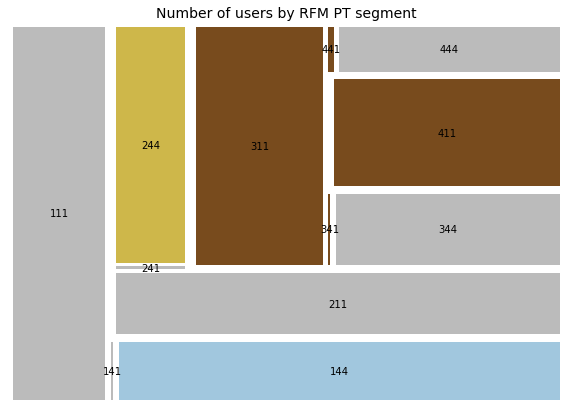

In [180]:
# Treemap with number of customers by segment

# Define colors for levels
def assignColor(rfm):
    if (rfm in ['144','114','124','134']):
         hex='#97c2db'   # Blue - Loyalty
    elif (rfm in ['213','223','233','243','113','123','133','143','214','224','234','244','112','122','132','142']):
        hex='#C9B037'   # Gold
    elif (rfm in ['111','121','131','141','211','212','221','222','231','232','241','242','312','313','314','322','323','324','332','333','334','342','343','344','413','414','423','424','433','434','443','444']):
       hex='#B4B4B4'   # Silver
    else:
        hex='#6A3805'   # Bronze
    return hex

color = [assignColor(x) for x in RFMStats.index]

# Draw
fig, ax = plt.subplots(figsize=(10,7))

# Plot
squarify.plot(sizes=RFMStats['Nr_users'], 
              label=RFMStats.index,
              color = color,
              alpha=.9,
              pad=True)                    

# Decoration
plt.title("Number of users by RFM PT segment",fontsize=plots_Title_fontSize)
plt.axis('off')
plt.show()

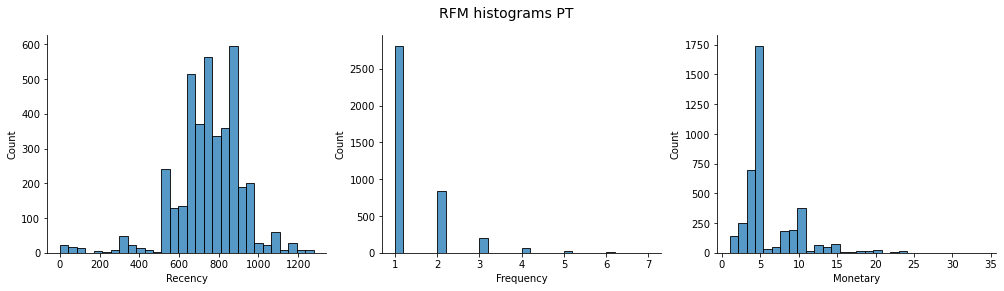

In [181]:
# Histogram of RFM
%matplotlib inline
cols = ['Recency','Frequency','Monetary']

# Draw
fig, ax = plt.subplots(1, 3, figsize=(17,4))
for var, subplot in zip(X[cols], ax.flatten()):
    g = sns.histplot(data=X2,
                bins=30,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("RFM histograms PT", fontsize=plots_Title_fontSize);

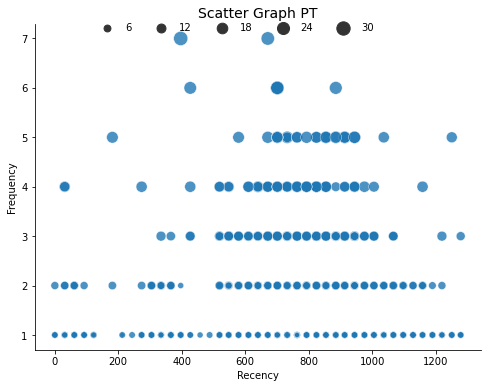

In [184]:
# Scatter plot of these rules

# Draw
fig, ax = plt.subplots(figsize=(8,6))
g = sns.scatterplot(data=X2, x="Recency", y="Frequency", size="Monetary", sizes=(20, 200), alpha=0.8)

# Decoration
sns.despine()
plt.title("Scatter Graph PT", fontsize=plots_Title_fontSize)
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=6, bbox_to_anchor=(0.45, 1.03), frameon=False)

### Basket Analysis 1

In [146]:
#Create a table only with Basket Analysis 1
atractions = ['Cais da Ribeira','Ponte de Dom Luís I']
Atractions_1 = ds_com[ds_com.Name.isin(atractions)]
Atractions_1

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
45627,MAG021,2021-08-20 15:43:05.827,4.5,1,355,24454,Temidayo S@nightwalker2020,NaN,21,Couples,2021-08-12,2021-08-01,4,en,This bridge in Porto is unmissable. A walk on ...,Ponte de Dom Luís I,Portugal,PT
45628,MAG021,2021-08-20 15:43:05.879,4.5,1,355,24454,juls21@juls21,"Birkenhead, UK",144,Other,2021-08-03,2021-07-01,5,en,We walked across both top and bottom levels of...,Ponte de Dom Luís I,Portugal,PT
45629,MAG021,2021-08-20 15:43:05.938,4.5,1,355,24454,WWH47@WWH47,"Baton Rouge, LA",121,Other,2021-08-02,2021-07-01,5,en,If you go to Porto you need to walk across th...,Ponte de Dom Luís I,Portugal,PT
45630,MAG021,2021-08-20 15:43:05.988,4.5,1,355,24454,Dominique C@Vacation650842,NaN,27,Other,2021-07-25,2021-07-01,5,en,The bridge connects Ribeira with Vila Nova de ...,Ponte de Dom Luís I,Portugal,PT
45631,MAG021,2021-08-20 15:43:06.035,4.5,1,355,24454,tomK412016@tomK412016,"Greater London, UK",86,Other,2021-07-16,2021-07-01,4,en,A stunning structure which dominates central P...,Ponte de Dom Luís I,Portugal,PT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73836,MAG049,2021-08-21 13:23:22.437,4.5,3,355,10859,GlavumTraveller@GlavumTraveller,"Gloucestershire, UK",241,Couples,2019-01-12,2019-01-01,5,en,A great place to wander or people watch. We fo...,Cais da Ribeira,Portugal,PT
73837,MAG049,2021-08-21 13:23:27.500,4.5,3,355,10859,nilintentum_reliquit@nilintentum_reliquit,"Melbourne, Australia",2378,Family,2019-01-10,2019-01-01,5,en,Hugging the waters edge with excellent views o...,Cais da Ribeira,Portugal,PT
73838,MAG049,2021-08-21 13:23:27.578,4.5,3,355,10859,MsWorldWide1986@MsWorldWide1986,"Sydney, Australia",229,Couples,2019-01-09,2019-01-01,5,en,The Ribeira is a beautiful walkway next to the...,Cais da Ribeira,Portugal,PT
73839,MAG049,2021-08-21 13:23:27.652,4.5,3,355,10859,rhobru@rhobru,"Toronto, Ontario, Canada",201,Family,2019-01-08,2018-12-01,5,en,A highly recommended activity. Watch the perfo...,Cais da Ribeira,Portugal,PT


In [185]:
#Calculating values for each metric with data filtered by Basket Analysis 1
import datetime
snapshot_date = max(Atractions_1.reviewVisited) + datetime.timedelta(days=1)
datamart = Atractions_1.groupby(['userName']).agg({
'reviewVisited': lambda x: (snapshot_date - x.max()).days, 
'userContributions': 'count',
'reviewRating': 'sum'})

datamart.rename(columns = {'reviewVisited': 'Recency',
'userContributions': 'Frequency',
'reviewRating': 'Monetary'}, inplace=True)

datamart.head()

,Recency,Frequency,Monetary
userName,,,
1234texas@1234texas,1005,1,4
177christine1956@177christine1956,548,1,5
265kristym@265kristym,854,1,5
307middleton70@307middleton70,548,1,5
30mait@30mait,944,1,4


In [186]:
# Determinining RFM cutting points based on the quartiles (default for pandas "describe")
cols = ['Recency','Frequency','Monetary']
X3=datamart
table = X3[cols].describe()
table

,Recency,Frequency,Monetary
count,980.000000,980.000000,980.000000
mean,743.627551,1.296939,6.066327
std,164.000558,0.509953,2.466670
min,1.000000,1.000000,1.000000
25%,671.000000,1.000000,5.000000
50%,763.000000,1.000000,5.000000
75%,824.000000,2.000000,8.000000
max,1278.000000,4.000000,20.000000


In [187]:
# Calculate RMF scores

# Function
def RFMScore(x, col):
    if x <= X3.quantile(0.25)[col]:
        return '1'
    elif  x <= X3.quantile(0.5)[col]:
        return '2'
    elif  x <= X3.quantile(0.75)[col]:
        return '3'
   
    else:
        return '4'

# Process
X3['RScore'] = X3['Recency'].apply(RFMScore, col='Recency')
X3['FScore'] = X3['Frequency'].apply(RFMScore, col='Frequency')
X3['MScore'] = X3['Monetary'].apply(RFMScore, col='Monetary')

In [188]:
# Show first 5
X3.head()

,Recency,Frequency,Monetary,RScore,FScore,MScore
userName,,,,,,
1234texas@1234texas,1005,1,4,4,1,1
177christine1956@177christine1956,548,1,5,1,1,1
265kristym@265kristym,854,1,5,4,1,1
307middleton70@307middleton70,548,1,5,1,1,1
30mait@30mait,944,1,4,4,1,1


In [189]:
# Create a column with full RMF score and sort the results

# Transform to string
cols = ['RScore','FScore','MScore']
X3[cols] = X3[cols].astype(str)

# Concatenate
X3['RFMScore'] = X3['RScore'] + X3['FScore'] + X3['MScore']

# Sort
X3 = X3.sort_values(by=['RFMScore'])

In [190]:
# Show first 5
X3.head()

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
Patricia A@patriciaaQ8116DL,579,1,4,1,1,1,111
MinKyu Cha@Departure62749811807,62,1,5,1,1,1,111
Mk-L@mkly8272,579,1,5,1,1,1,111
Monique K@moniquek162,671,1,4,1,1,1,111
richard menczer@rmenczer,579,1,5,1,1,1,111


In [191]:
# Calculate statistics per RFM segment
RFMStats = X3.reset_index().groupby(['RFMScore']).agg(Nr_users=('userName', lambda i: len(i.unique())),
                                                     avgRecency=('Recency', 'mean'),
                                                     avgFrequency=('Frequency', 'mean'),
                                                     avgMonetary=('Monetary', 'mean')).fillna(0)

In [192]:
RFMStats

,Nr_users,avgRecency,avgFrequency,avgMonetary
RFMScore,,,,
111,233,556.824034,1.000000,4.725322
133,9,640.222222,2.000000,7.555556
134,52,576.980769,2.000000,9.673077
211,164,727.652439,1.000000,4.713415
231,1,732.000000,2.000000,4.000000
233,22,727.772727,2.000000,7.818182
234,45,736.133333,2.000000,9.866667
244,8,732.000000,3.000000,13.375000
311,141,809.489362,1.000000,4.617021


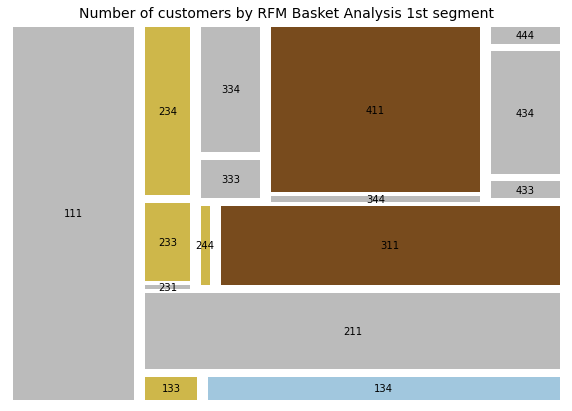

In [194]:
# Treemap with number of customers by segment

# Define colors for levels
def assignColor(rfm):
    if (rfm in ['144','114','124','134']):
        hex='#97c2db'   # Blue - Loyalty
    elif (rfm in ['213','223','233','243','113','123','133','143','214','224','234','244','112','122','132','142']):
        hex='#C9B037'   # Gold
    elif (rfm in ['111','121','131','141','211','212','221','222','231','232','241','242','312','313','314','322','323','324','332','333','334','342','343','344','413','414','423','424','433','434','443','444']):
       hex='#B4B4B4'   # Silver
    else:
        hex='#6A3805'   # Bronze
    return hex

color = [assignColor(x) for x in RFMStats.index]

# Draw
fig, ax = plt.subplots(figsize=(10,7))

# Plot
squarify.plot(sizes=RFMStats['Nr_users'], 
              label=RFMStats.index,
              color = color,
              alpha=.9,
              pad=True)                    

# Decoration
plt.title("Number of customers by RFM Basket Analysis 1st segment",fontsize=plots_Title_fontSize)
plt.axis('off')
plt.show()

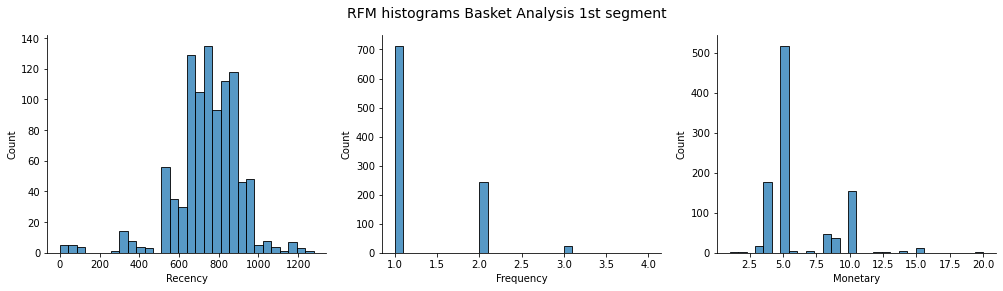

In [195]:
# Histogram of RFM
%matplotlib inline
cols = ['Recency','Frequency','Monetary']

# Draw
fig, ax = plt.subplots(1, 3, figsize=(17,4))
for var, subplot in zip(X[cols], ax.flatten()):
    g = sns.histplot(data=X3,
                bins=30,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("RFM histograms Basket Analysis 1st segment", fontsize=plots_Title_fontSize);

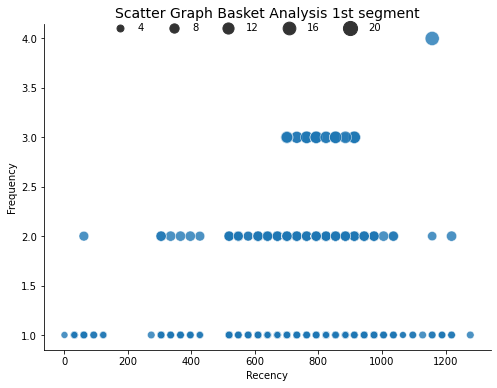

In [196]:
# Scatter plot of these rules

# Draw
fig, ax = plt.subplots(figsize=(8,6))
g = sns.scatterplot(data=X3, x="Recency", y="Frequency", size="Monetary", sizes=(20, 200), alpha=0.8)

# Decoration
sns.despine()
plt.title("Scatter Graph Basket Analysis 1st segment", fontsize=plots_Title_fontSize)
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=6, bbox_to_anchor=(0.45, 1.03), frameon=False)

### RFM Basket Analysis 2

In [147]:
#Create a table only with Basket Analysis 2
atractions_2 = ['Park and National Palace of Pena','Quinta da Regaleira']
Atractions_2 = ds_com[ds_com.Name.isin(atractions_2)]
Atractions_2

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
59639,MAG032,2021-08-21 10:23:25.954,4.5,2,71,18392,stephrab@stephrab,"New York City, NY",537,Couples,2021-08-19,2021-08-01,3,en,The view from the castle is stunning. The cast...,Park and National Palace of Pena,Portugal,PT
59640,MAG032,2021-08-21 10:23:26.039,4.5,2,71,18392,Paddy_16@Paddy_1616,"London, UK",4,Other,2021-08-18,2019-09-01,4,en,Pena is a stunning place to visit. The views a...,Park and National Palace of Pena,Portugal,PT
59641,MAG032,2021-08-21 10:23:26.121,4.5,2,71,18392,Susan F@Y4246OVsusanf,"Paris, France",32,Other,2021-08-15,2021-08-01,5,en,We spent two hours here but you can easily spe...,Park and National Palace of Pena,Portugal,PT
59642,MAG032,2021-08-21 10:23:26.195,4.5,2,71,18392,Barbs25@Barbs25,"Staffordshire, UK",2273,Friends,2021-08-11,2021-07-01,3,en,Go to Quinta de regaleira instead as that’s am...,Park and National Palace of Pena,Portugal,PT
59643,MAG032,2021-08-21 10:23:26.285,4.5,2,71,18392,Enrico@doublee72,Italy,7,Other,2021-08-07,2021-08-01,5,en,"Beautiful park, it may seem expensive but it i...",Park and National Palace of Pena,Portugal,PT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72895,MAG047,2021-08-21 13:14:06.775,5.0,1,71,13342,Supriya K@PriyaAbuDhabi,"Abu Dhabi, United Arab Emirates",13,Family,2019-01-06,2018-12-01,4,en,"Quinta da Regaleira has numerous steps, wells,...",Quinta da Regaleira,Portugal,PT
72896,MAG047,2021-08-21 13:14:06.851,5.0,1,71,13342,nmarion2018@nmarion2018,"Ames, IA",2,Other,2019-01-04,2018-12-01,5,en,"Incredible place, not to be missed! AMazing s...",Quinta da Regaleira,Portugal,PT
72897,MAG047,2021-08-21 13:14:06.924,5.0,1,71,13342,Ays Espiritu@AkoSiAys,"Bonn, Germany",390,Couples,2019-01-04,2018-02-01,5,en,The whole place is just splendid! The palace l...,Quinta da Regaleira,Portugal,PT
72898,MAG047,2021-08-21 13:14:07.002,5.0,1,71,13342,Daniel W@O3834UFdanielw,"London, UK",149,Couples,2019-01-02,2018-12-01,5,en,"Without a doubt, Quinta da Regaleira is the be...",Quinta da Regaleira,Portugal,PT


In [197]:
#Calculating values for each metric with data filtered by Basket Analysis 1
import datetime
snapshot_date = max(Atractions_2.reviewVisited) + datetime.timedelta(days=1)
datamart = Atractions_2.groupby(['userName']).agg({
'reviewVisited': lambda x: (snapshot_date - x.max()).days, 
'userContributions': 'count',
'reviewRating': 'sum'})

datamart.rename(columns = {'reviewVisited': 'Recency',
'userContributions': 'Frequency',
'reviewRating': 'Monetary'}, inplace=True)

datamart.head()

,Recency,Frequency,Monetary
userName,,,
0Garza@0Garza,548,1,3
101eggie@101eggie,671,1,1
1527holiday1011@1527holiday1011,913,2,10
1parislover@1parislover,885,2,10
2kids2cats...&hens@2kids2cats2cavies,763,1,4


In [198]:
# Determinining RFM cutting points based on the quartiles (default for pandas "describe")
cols = ['Recency','Frequency','Monetary']
X4=datamart
table = X4[cols].describe()
table

,Recency,Frequency,Monetary
count,1337.000000,1337.000000,1337.000000
mean,749.871354,1.198205,5.292446
std,167.643588,0.411725,2.276319
min,1.000000,1.000000,1.000000
25%,671.000000,1.000000,4.000000
50%,763.000000,1.000000,5.000000
75%,854.000000,1.000000,5.000000
max,1278.000000,3.000000,15.000000


In [199]:
# Calculate RMF scores

# Function
def RFMScore(x, col):
    if x <= X4.quantile(0.25)[col]:
        return '1'
    elif  x <= X4.quantile(0.5)[col]:
        return '2'
    elif  x <= X4.quantile(0.75)[col]:
        return '3'
   
    else:
        return '4'

# Process
X4['RScore'] = X4['Recency'].apply(RFMScore, col='Recency')
X4['FScore'] = X4['Frequency'].apply(RFMScore, col='Frequency')
X4['MScore'] = X4['Monetary'].apply(RFMScore, col='Monetary')

In [200]:
# Show first 5
X4.head()

,Recency,Frequency,Monetary,RScore,FScore,MScore
userName,,,,,,
0Garza@0Garza,548,1,3,1,1,1
101eggie@101eggie,671,1,1,1,1,1
1527holiday1011@1527holiday1011,913,2,10,4,4,4
1parislover@1parislover,885,2,10,4,4,4
2kids2cats...&hens@2kids2cats2cavies,763,1,4,2,1,1


In [201]:
# Create a column with full RMF score and sort the results

# Transform to string
cols = ['RScore','FScore','MScore']
X4[cols] = X4[cols].astype(str)

# Concatenate
X4['RFMScore'] = X4['RScore'] + X4['FScore'] + X4['MScore']

# Sort
X4 = X4.sort_values(by=['RFMScore'])

In [202]:
# Show first 5
X4.head()

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
0Garza@0Garza,548,1,3,1,1,1,111
KLBOS@KLBOS,640,1,4,1,1,1,111
Karen R@F2398WXkarenr,671,1,4,1,1,1,111
L G@luisgL9818TE,579,1,1,1,1,1,111
Laura H@958LauraH,671,1,4,1,1,1,111


In [203]:
# Calculate statistics per RFM segment
RFMStats = X4.reset_index().groupby(['RFMScore']).agg(Nr_users=('userName', lambda i: len(i.unique())),
                                                     avgRecency=('Recency', 'mean'),
                                                     avgFrequency=('Frequency', 'mean'),
                                                     avgMonetary=('Monetary', 'mean')).fillna(0)

In [205]:
RFMStats

,Nr_users,avgRecency,avgFrequency,avgMonetary
RFMScore,,,,
111,104,576.663462,1.000000,3.096154
112,200,562.550000,1.000000,5.000000
144,79,554.227848,2.000000,9.253165
211,140,732.442857,1.000000,3.171429
212,163,734.092025,1.000000,5.000000
244,57,723.842105,2.105263,9.543860
311,110,820.854545,1.000000,3.209091
312,153,825.091503,1.000000,5.000000
344,79,826.784810,2.012658,9.354430


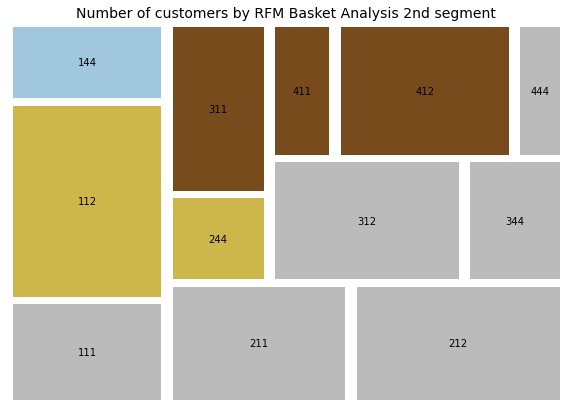

In [206]:
# Treemap with number of customers by segment

# Define colors for levels
def assignColor(rfm):
    if (rfm in ['144','114','124','134']):
        hex='#97c2db'   # Blue - Loyalty
    elif (rfm in ['213','223','233','243','113','123','133','143','214','224','234','244','112','122','132','142']):
        hex='#C9B037'   # Gold
    elif (rfm in ['111','121','131','141','211','212','221','222','231','232','241','242','312','313','314','322','323','324','332','333','334','342','343','344','413','414','423','424','433','434','443','444']):
       hex='#B4B4B4'   # Silver
    else:
        hex='#6A3805'   # Bronze
    return hex

color = [assignColor(x) for x in RFMStats.index]

# Draw
fig, ax = plt.subplots(figsize=(10,7))

# Plot
squarify.plot(sizes=RFMStats['Nr_users'], 
              label=RFMStats.index,
              color = color,
              alpha=.9,
              pad=True)                    

# Decoration
plt.title("Number of customers by RFM Basket Analysis 2nd segment",fontsize=plots_Title_fontSize)
plt.axis('off')
plt.show()

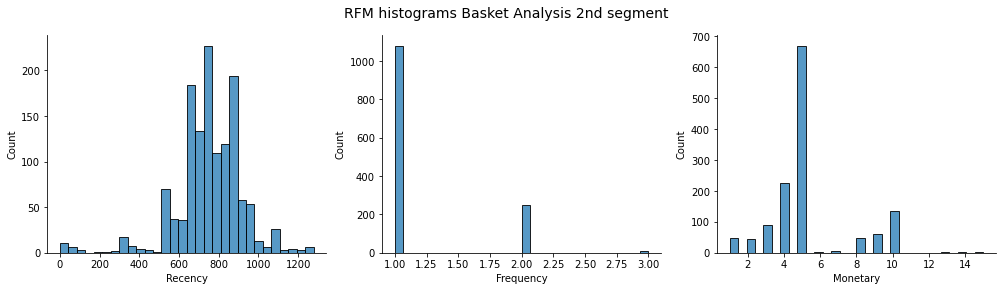

In [207]:
# Histogram of RFM
%matplotlib inline
cols = ['Recency','Frequency','Monetary']

# Draw
fig, ax = plt.subplots(1, 3, figsize=(17,4))
for var, subplot in zip(X[cols], ax.flatten()):
    g = sns.histplot(data=X4,
                bins=30,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("RFM histograms Basket Analysis 2nd segment", fontsize=plots_Title_fontSize);

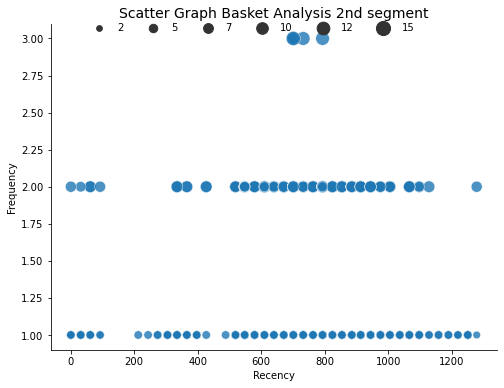

In [214]:
# Scatter plot of these rules

# Draw
fig, ax = plt.subplots(figsize=(8,6))
g = sns.scatterplot(data=X4, x="Recency", y="Frequency", size="Monetary", sizes=(20, 200), alpha=0.8)

# Decoration
sns.despine()
plt.title("Scatter Graph Basket Analysis 2nd segment", fontsize=plots_Title_fontSize)
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=6, bbox_to_anchor=(0.45, 1.03), frameon=False)

### RFM Basket Analysis 3

In [148]:
#Create a table only with Basket Analysis 3
atractions_3 = ['Torre de Belém','Mosteiro dos Jeronimos']
Atractions_3 = ds_com[ds_com.Name.isin(atractions_3)]
Atractions_3

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
29827,MAG010,2021-08-20 13:10:44.095,4.0,6,726,36979,Barbs25@Barbs25,"Staffordshire, UK",2273,Friends,2021-08-11,2021-07-01,3,en,Not blown away by it but nice enough to look a...,Torre de Belém,Portugal,PT
29828,MAG010,2021-08-20 13:10:44.126,4.0,6,726,36979,WWH47@WWH47,"Baton Rouge, LA",121,Other,2021-08-02,2021-07-01,5,en,Well worth the visit in the Belem portion of t...,Torre de Belém,Portugal,PT
29829,MAG010,2021-08-20 13:10:44.173,4.0,6,726,36979,Runawayblond@runawayblond,"Chicago, IL",217,Solo,2021-07-26,2021-06-01,4,en,Really cool! Sadly it was closed to explore be...,Torre de Belém,Portugal,PT
29830,MAG010,2021-08-20 13:10:44.204,4.0,6,726,36979,Darren H@DarrenHumphrey,"Orlando, FL",298,Other,2021-07-24,2021-06-01,5,en,What visit to Lisbon is complete without at le...,Torre de Belém,Portugal,PT
29831,MAG010,2021-08-20 13:10:44.257,4.0,6,726,36979,Kevin S@kevins684,"Pontypridd, UK",4550,Other,2021-07-23,2021-07-01,4,en,"A 16th century tower, ornately built so seemin...",Torre de Belém,Portugal,PT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38328,MAG014,2021-08-20 14:32:19.759,4.5,3,726,30707,c0verdale@c0verdale,"Riverview, Canada",1037,Couples,2019-01-03,2018-09-01,4,en,This majestic building built in 1502 is a beau...,Mosteiro dos Jeronimos,Portugal,PT
38329,MAG014,2021-08-20 14:32:19.806,4.5,3,726,30707,Leah M@25leahm,"London, UK",322,Family,2019-01-03,2018-12-01,5,en,We stopped by the Jeronimos Monastery one afte...,Mosteiro dos Jeronimos,Portugal,PT
38330,MAG014,2021-08-20 14:32:19.837,4.5,3,726,30707,nilintentum_reliquit@nilintentum_reliquit,"Melbourne, Australia",2378,Family,2019-01-03,2019-01-01,5,en,This is an absolutely breathtakingly stunning ...,Mosteiro dos Jeronimos,Portugal,PT
38331,MAG014,2021-08-20 14:32:19.884,4.5,3,726,30707,rupert from UK@rupertfromUK,"Cambridge, UK",17,Family,2019-01-03,2018-12-01,5,en,This place has to be seen! Knock out monastery...,Mosteiro dos Jeronimos,Portugal,PT


In [215]:
#Calculating values for each metric filtered for Basket Analysis 3
import datetime
snapshot_date = max(Atractions_3.reviewVisited) + datetime.timedelta(days=1)
datamart = Atractions_3.groupby(['userName']).agg({
'reviewVisited': lambda x: (snapshot_date - x.max()).days, 
'userContributions': 'count',
'reviewRating': 'sum'})

datamart.rename(columns = {'reviewVisited': 'Recency',
'userContributions': 'Frequency',
'reviewRating': 'Monetary'}, inplace=True)

datamart.head()

,Recency,Frequency,Monetary
userName,,,
007JNR@007JNR,823,1,4
0Garza@0Garza,517,2,8
1104@1104,793,1,5
110Helen2014@110Helen2014,517,1,5
13playaazul@13playaazul,670,1,5


In [216]:
# Determinining RFM cutting points based on the quartiles (default for pandas "describe")
cols = ['Recency','Frequency','Monetary']
X5=datamart
table = X5[cols].describe()
table

,Recency,Frequency,Monetary
count,1990.000000,1990.000000,1990.000000
mean,726.443719,1.269849,5.472864
std,163.276644,0.493340,2.328484
min,1.000000,1.000000,1.000000
25%,640.000000,1.000000,4.000000
50%,732.000000,1.000000,5.000000
75%,823.000000,1.000000,5.000000
max,1247.000000,3.000000,15.000000


In [217]:
# Calculate RMF scores

# Function
def RFMScore(x, col):
    if x <= X5.quantile(0.25)[col]:
        return '1'
    elif  x <= X5.quantile(0.5)[col]:
        return '2'
    elif  x <= X5.quantile(0.75)[col]:
        return '3'
   
    else:
        return '4'

# Process
X5['RScore'] = X5['Recency'].apply(RFMScore, col='Recency')
X5['FScore'] = X5['Frequency'].apply(RFMScore, col='Frequency')
X5['MScore'] = X5['Monetary'].apply(RFMScore, col='Monetary')

In [218]:
# Show first 5
X5.head()

,Recency,Frequency,Monetary,RScore,FScore,MScore
userName,,,,,,
007JNR@007JNR,823,1,4,3,1,1
0Garza@0Garza,517,2,8,1,4,4
1104@1104,793,1,5,3,1,2
110Helen2014@110Helen2014,517,1,5,1,1,2
13playaazul@13playaazul,670,1,5,2,1,2


In [219]:
# Create a column with full RMF score and sort the results

# Transform to string
cols = ['RScore','FScore','MScore']
X5[cols] = X5[cols].astype(str)

# Concatenate
X5['RFMScore'] = X5['RScore'] + X5['FScore'] + X5['MScore']

# Sort
X5 = X5.sort_values(by=['RFMScore'])

In [220]:
# Show first 5
X5.head()

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
KitRaetsen@KitRaetsen,517,1,4,1,1,1,111
Prodipto B@ProdiptoB2,517,1,4,1,1,1,111
J&J@alwaystraveling2see,640,1,3,1,1,1,111
paul s@pauls077,640,1,3,1,1,1,111
RGYorkshire@RGYorkshire,640,1,1,1,1,1,111


In [221]:
# Calculate statistics per RFM segment
RFMStats = X5.reset_index().groupby(['RFMScore']).agg(Nr_users=('userName', lambda i: len(i.unique())),
                                                     avgRecency=('Recency', 'mean'),
                                                     avgFrequency=('Frequency', 'mean'),
                                                     avgMonetary=('Monetary', 'mean')).fillna(0)

In [222]:
RFMStats

,Nr_users,avgRecency,avgFrequency,avgMonetary
RFMScore,,,,
111,184,538.701087,1.000000,3.445652
112,261,544.892720,1.000000,5.000000
141,3,538.333333,2.000000,4.000000
144,137,533.335766,2.021898,8.839416
211,157,695.866242,1.000000,3.541401
212,166,696.144578,1.000000,5.000000
241,3,690.666667,2.000000,3.333333
242,1,701.000000,2.000000,5.000000
244,112,700.169643,2.142857,9.035714


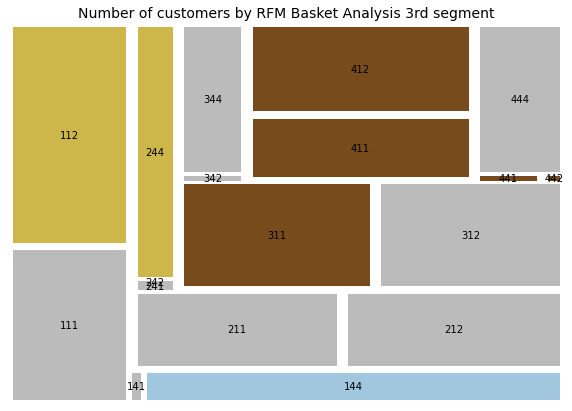

In [223]:
# Treemap with number of customers by segment

# Define colors for levels
def assignColor(rfm):
    if (rfm in ['144','114','124','134']):
        hex='#97c2db'   # Blue - Loyalty
    elif (rfm in ['213','223','233','243','113','123','133','143','214','224','234','244','112','122','132','142']):
        hex='#C9B037'   # Gold
    elif (rfm in ['111','121','131','141','211','212','221','222','231','232','241','242','312','313','314','322','323','324','332','333','334','342','343','344','413','414','423','424','433','434','443','444']):
       hex='#B4B4B4'   # Silver
    else:
        hex='#6A3805'   # Bronze
    return hex

color = [assignColor(x) for x in RFMStats.index]

# Draw
fig, ax = plt.subplots(figsize=(10,7))

# Plot
squarify.plot(sizes=RFMStats['Nr_users'], 
              label=RFMStats.index,
              color = color,
              alpha=.9,
              pad=True)                    

# Decoration
plt.title("Number of customers by RFM Basket Analysis 3rd segment",fontsize=plots_Title_fontSize)
plt.axis('off')
plt.show()

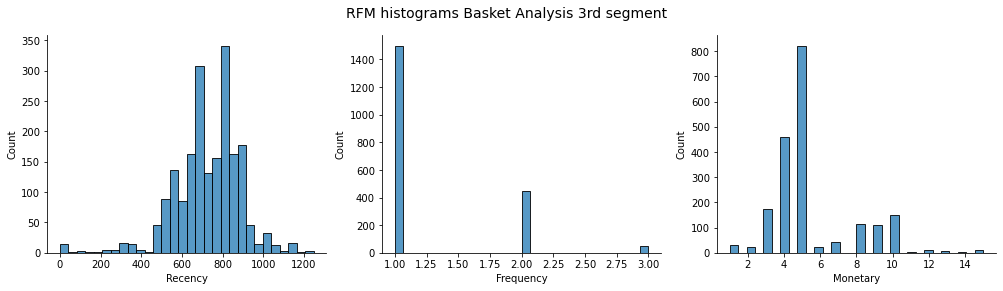

In [224]:
# Histogram of RFM
%matplotlib inline
cols = ['Recency','Frequency','Monetary']

# Draw
fig, ax = plt.subplots(1, 3, figsize=(17,4))
for var, subplot in zip(X[cols], ax.flatten()):
    g = sns.histplot(data=X5,
                bins=30,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("RFM histograms Basket Analysis 3rd segment", fontsize=plots_Title_fontSize);

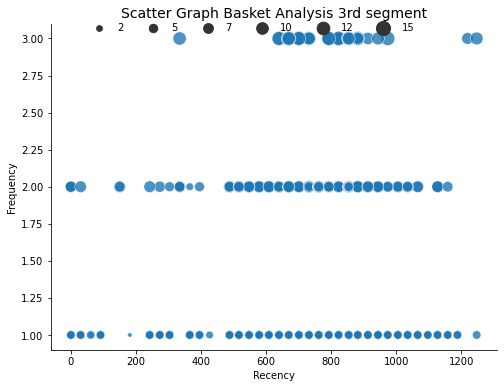

In [230]:
# Scatter plot of these rules

# Draw
fig, ax = plt.subplots(figsize=(8,6))
g = sns.scatterplot(data=X5, x="Recency", y="Frequency", size="Monetary", sizes=(20, 200), alpha=0.8)

# Decoration
sns.despine()
plt.title("Scatter Graph Basket Analysis 3rd segment", fontsize=plots_Title_fontSize)
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=6, bbox_to_anchor=(0.45, 1.03), frameon=False)